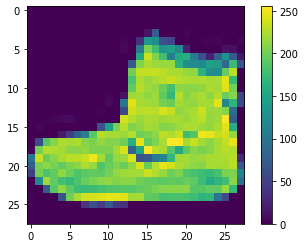

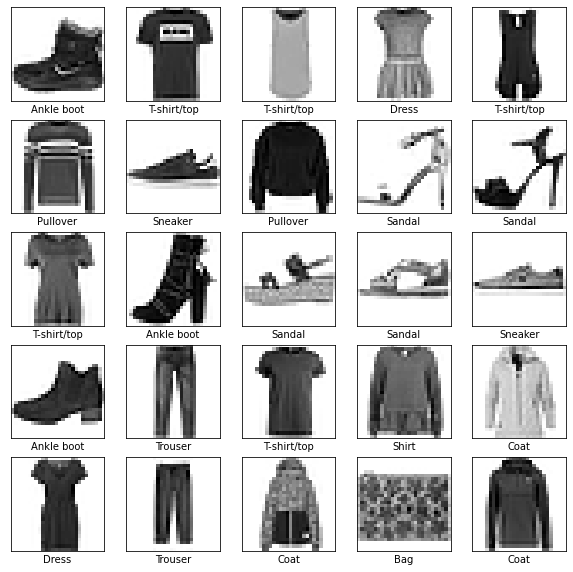

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4926 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3710 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3334 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3092 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2924 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2769 - accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2648 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2537 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2445 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

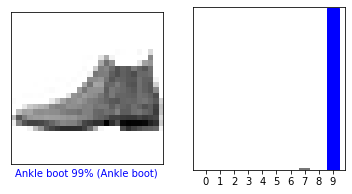

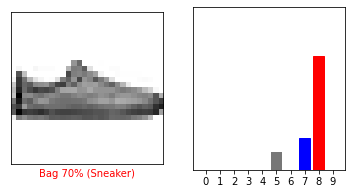

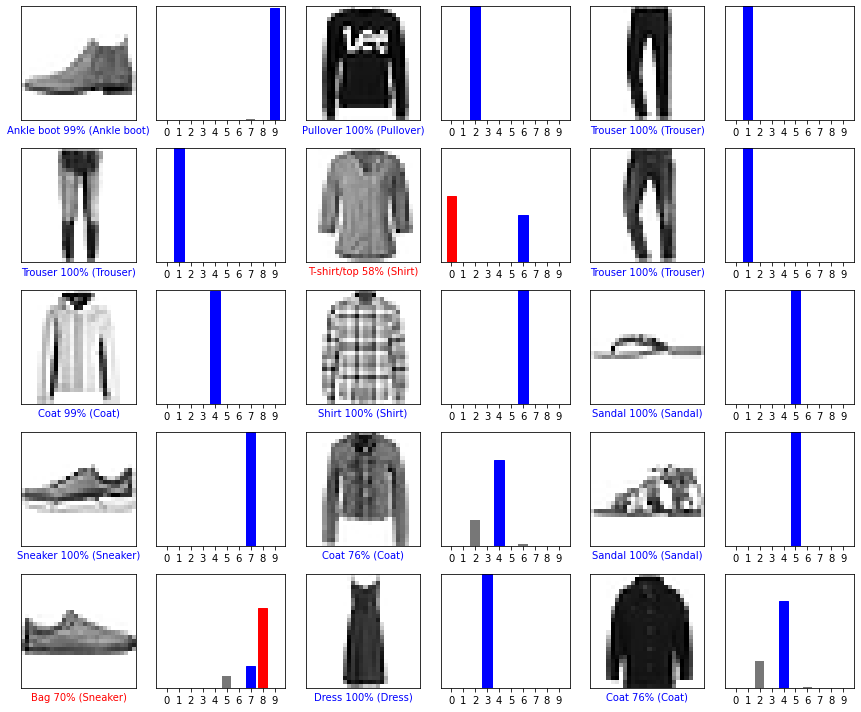

In [4]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됨
# train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
# test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이 
# 레이블(label)은 0에서 9까지의 정수 배열
# 이 값은 이미지에 있는 옷의 클래스(class)를 나타냄
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 훈련 세트에 60000개의 이미지가 있다는 것을 보여줌
# 각 이미지는 28*28 픽셀
train_images.shape  #(60000, 28, 28)
# 각 레이블은 0과 9 사이의 정수
train_labels    # array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)
# 테스트 세트 10000개의 이미지가 있음
test_images.shape   #(10000, 28, 28)

# 데이터 전처리
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 픽셀 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

# 훈련 세트에서 처음 25개의 이미지와 그 아래 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성
# 층 설정
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# 모델 컴파일
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
# 모델 피드
model.fit(train_images, train_labels, epochs=10)
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# 예측
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# 예측확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# 신뢰도 점수가 높을 때도 잘못 예측할 수 있음
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()